# ***Instrucciones***

# Considere el conjunto de datos Weekly el cual es similar al conjunto de datos Smarket, excepto que el primero, respectivamente, contiene un registro de 1,089 semanas para 21 años (de inicios de 1990 a finales de 2010).


---



# (a) Obtenga información estadística y gráfica acerca del conjunto de datos. ¿Existe algún patrón?



In [ ]:
#Información estadística
Var_Corr.style.background_gradient(cmap='coolwarm')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


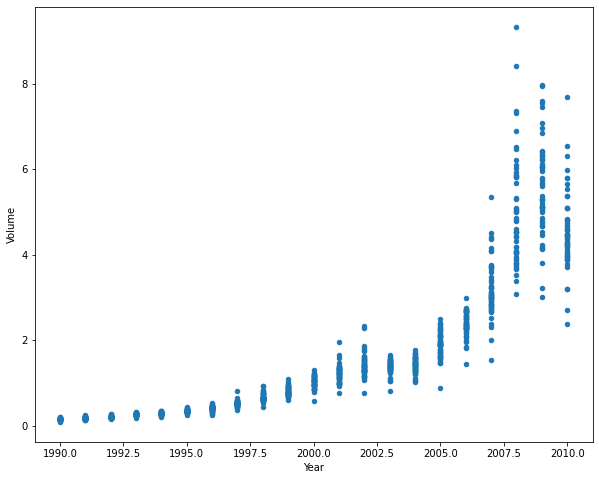

In [ ]:
#Información gráfica
Plot_A = dfW.plot.scatter(x='Year',y='Volume', figsize=(10,8))

  >R = Con ayuda de la gráfica y con la matriz de correlación podemos observar que las variables "Volume" y "Year" tienen una mayor correlación y que "volume" aumenta conforme aumenta el tiempo.

# (b) Utilice el conjunto completo de datos para realizar una regresión logística considerando a Direction como respuesta y a las variables LagX y Volume como predictores. Muestre los resultados. ¿Alguno de los predictores es estadísticamente significativo? ¿Cuál o cuáles?

  >R= Lag2, con un valor P de 0.030 indica que existe evidencia suficiente para rechazar la hipótesis nula.


---


# (c) Calcule la matriz de confusión y el nivel de exactitud del modelo. Explique los resultados de la matriz de confusión acerca de los tipos de errores hechos por la regresión logística.





In [ ]:
import pandas as pd

Path = "/content/drive/MyDrive/PCś/RP/"
dfW = pd.read_csv(Path+'Weekly.csv')

#Información estadística
Var_Corr = dfW.corr(method='pearson')
print(Var_Corr)

import statsmodels.api as sm
import statsmodels.formula.api as smf

#Se utiliza el método binomial en Statsmodels
mod_bn = smf.glm(formula='Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data=dfW, family=sm.families.Binomial()).fit()
print(mod_bn.summary())

import statsmodels.api as stm
import statsmodels.api as smf

dfW['Direction2'] = dfW['Direction'].factorize()[0]
y = dfW['Direction2']
X = dfW[['Volume','Lag1','Lag2','Lag3','Lag4','Lag5']]

#Se utiliza el método de MLE en Statsmodels para comparar resultados
#model = smf.Logit(y,X).fit()
#print(model.summary())

#Se realizan predicciones con el modelo
y_prob = mod_bn.predict(X)
Tpred = len(y_prob)

decision_prob = 0.5 #Frontera de decisión
df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_prob > decision_prob})

#Confusion Matrix
import numpy as np

df_.replace(to_replace={True:1, False:0}, inplace=True) #Se remplaza los true por 1 y los false por 0
y_pred = np.asarray(df_['Predicted default status'])
df_.replace(to_replace={0:'Up', 1:'Down'}, inplace=True)
confusion_matrix = df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')
print('\n',confusion_matrix)
FP = np.array(confusion_matrix['Down']['Up'])
FN = np.array(confusion_matrix['Up']['Down'])
TN = np.array(confusion_matrix['Down']['Down'])
TP = np.array(confusion_matrix['Up']['Up'])
VerifAccur =  (TP+TN)/Tpred
print('\n')
print('TN: ',TN,' FN: ',FN,' TP: ', TP, ' FP: ', FP)

#Metricas de sklearn
import sklearn.linear_model as lm
import sklearn.discriminant_analysis as da
import sklearn.neighbors as nb
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score

Precis = precision_score(y, y_pred)
Accur  = accuracy_score(y, y_pred)


print('\nprecision_score: ',Precis)
print('accuracy_score:  ',Accur )
print('Verific_Accur:   ',VerifAccur )


            Year      Lag1      Lag2  ...      Lag5    Volume     Today
Year    1.000000 -0.032289 -0.033390  ... -0.030519  0.841942 -0.032460
Lag1   -0.032289  1.000000 -0.074853  ... -0.008183 -0.064951 -0.075032
Lag2   -0.033390 -0.074853  1.000000  ... -0.072499 -0.085513  0.059167
Lag3   -0.030006  0.058636 -0.075721  ...  0.060657 -0.069288 -0.071244
Lag4   -0.031128 -0.071274  0.058382  ... -0.075675 -0.061075 -0.007826
Lag5   -0.030519 -0.008183 -0.072499  ...  1.000000 -0.058517  0.011013
Volume  0.841942 -0.064951 -0.085513  ... -0.058517  1.000000 -0.033078
Today  -0.032460 -0.075032  0.059167  ...  0.011013 -0.033078  1.000000

[8 rows x 8 columns]
                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                          

>R= De la matriz de confusión podemos observar que el modelo predijo 102 Down de los   cuales 48 fueron verdaderos negativos y 54 fueron falsos positivos. De los 987 que predijo como Up, 430 fueron verdaderos positivos y 557 falsos positivos.

>Observamos que en la matriz de confusión da como resultado muchos falsos positivos, es decir, el modelo predice que el mercado subirá, cuando la realidad es todo lo contrario, el mercado bajará.
Por otra parte, el modelo está prediciendo poco falsos negativos lo que indica que se está acertando cuando se dice que el mercado subirá.

>La precisión es de 0.47 y la exactitud del modelo es del 44%



# (d) Entrene el modelo de regresión logística utilizando como conjunto entrenamiento el periodo de 1990 a 2008, con Lag2 como el único predictor. El periodo de 2009 a 2010 corresponde al conjunto de pruebas. Calcule la matriz de confusión y las métricas de exactitud y precisión para ambos conjuntos.
  



In [ ]:
#Entrenamiento
import pandas as pd

Path = "/content/drive/MyDrive/PCś/RP/"
dfW = pd.read_csv(Path+'Weekly.csv')
dfW['Direction2'] = dfW['Direction'].factorize()[0]

#Conjunto de entrenamiento
dfW_train = dfW[dfW.Year <= 2008]

#Conjunto de pruebas
dfW_test = dfW[dfW.Year >= 2009]
X_test  = dfW_test[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
y_test  = dfW_test[['Direction']]
y_True = np.asarray(dfW_test['Direction2'])

#Se utiliza el método binomial de statsmodel y se entrena el modelo
import statsmodels.api as sm
import statsmodels.formula.api as smf
mod_bn2 = smf.glm(formula='Direction~Lag2', data=dfW_train, family=sm.families.Binomial()).fit()
print(mod_bn2.summary())

#Se agregan constantes al conjunto de prueba para usar stastsmodel
X_test = sm.add_constant(X_test)
#Se realizan predicciones con el modelo
y_prob = mod_bn2.predict(X_test)
Tpred = len(y_prob)
# reset indices
y_test = y_test.reset_index()['Direction']
y_prob = y_prob.reset_index()[0]


decision_prob = 0.5 #Frontera de decisión
df_ = pd.DataFrame({'True default status': y_test,
                    'Predicted default status': y_prob > decision_prob})

# matriz de confusión 
import numpy as np

df_.replace(to_replace={True:1, False:0}, inplace=True) #Se remplaza los true por 1 y los false por 0
y_pred = np.asarray(df_['Predicted default status'])
df_.replace(to_replace={0:'Up', 1:'Down'}, inplace=True)
confusion_matrix = df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')
print('\n',confusion_matrix)

FP = np.array(confusion_matrix['Down']['Up'])
FN = np.array(confusion_matrix['Up']['Down'])
TN = np.array(confusion_matrix['Down']['Down'])
TP = np.array(confusion_matrix['Up']['Up'])
VerifAccur =  (TP+TN)/(Tpred)
print('\n')
print('TN: ',TN,' FN: ',FN,' TP: ', TP, ' FP: ', FP)


#Metricas de sklearn
import sklearn.linear_model as lm
import sklearn.discriminant_analysis as da
import sklearn.neighbors as nb
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score

Preci = 1-precision_score(y_True, y_pred)
Acc   = 1-accuracy_score(y_True, y_pred)

#out
print('\nprecision_score: ',Preci)
print('accuracy_score:  ',Acc)
print('Verific_Accur:   ',VerifAccur)

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                  985
Model:                                              GLM   Df Residuals:                      983
Model Family:                                  Binomial   Df Model:                            1
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -675.27
Date:                                  Thu, 13 May 2021   Deviance:                       1350.5
Time:                                          05:16:56   Pearson chi2:                     985.
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

  >R= De la matriz de confusión se puede observar que se obtienen más verdaderos negativos que falsos negativos y más verdaderos positivos que falsos positivos, por lo que el modelo tiene una precisión del 62.5%. En general tiene mayores aciertos en "Down" y "Up".

# (e) Repita (d) utilizando LDA.




In [ ]:
# LDA

import pandas as pd
import numpy as np
import sklearn.linear_model as lm
import sklearn.discriminant_analysis as da
import sklearn.neighbors as nb
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score

Path = "/content/drive/MyDrive/PCś/RP/"
dfW = pd.read_csv(Path+'Weekly.csv')
dfW['Direction2'] = dfW['Direction'].factorize()[0]

#conjunto de entrenamiento
X_train = dfW[dfW.Year <= 2008][['Lag2']]
y_train = dfW[dfW.Year <= 2008][['Direction2']]
#conjunto de prueba
X_test  = dfW[dfW.Year >= 2009][['Lag2']]
y_test  = dfW[dfW.Year >= 2009][['Direction2']]

#Modelo LDA
lda = da.LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
#Parametros LDA
lda.priors_
lda.means_
lda.coef_

y_test = np.array(y_test)
#Matriz de Cofusión
Conf_Matr= confusion_matrix(y_test, y_pred).T
#Out
print(classification_report(y_test, y_pred, digits=3))
print('Matriz de confusión: \n',Conf_Matr,'\n\n\n\n\n\n\n\n')



              precision    recall  f1-score   support

           0      0.643     0.209     0.316        43
           1      0.622     0.918     0.742        61

    accuracy                          0.625       104
   macro avg      0.633     0.564     0.529       104
weighted avg      0.631     0.625     0.566       104

Matriz de confusión: 
 [[ 9  5]
 [34 56]] 










/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  >R= Se observa que se tiene la misma matriz de confusión y una precisión del 62.5%

# (f) Repita (d) utilizando QDA.


In [ ]:
# QDA
qda  = da.QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict(X_test)

lda.priors_
lda.means_
lda.coef_

y_test = np.array(y_test)
CM = confusion_matrix(y_test, pred).T
print(classification_report(y_test, pred, digits=3))
print('Matriz de confusión:  \n',CM,'\n\n\n\n\n\n\n\n')


              precision    recall  f1-score   support

           0      0.000     0.000     0.000        43
           1      0.587     1.000     0.739        61

    accuracy                          0.587       104
   macro avg      0.293     0.500     0.370       104
weighted avg      0.344     0.587     0.434       104

Matriz de confusión:  
 [[ 0  0]
 [43 61]] 










/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  >R= Aquí la matriz de confusión cambia, se puede interpretar que no existirá ningún "Down" (caída en el mercado), lo cual es lógicamente imposible por lo que el modelo empeora en precisión, con 58.7% en precisión


# (g) Repita (d) utilizando KNN con K = 1.





In [ ]:
#Modelo KNN K=1
print('K=1')
knn_1 = nb.KNeighborsClassifier(n_neighbors=1)

pred1 = knn_1.fit(X_train, y_train).predict(X_test)

CMKNN = confusion_matrix(y_test, pred1).T

print(classification_report(y_test, pred1, digits=3))
print('Matriz de confusión:  \n',CMKNN,'\n\n\n')

#Modelo KNN K=3
print('K=3')
knn_3 = nb.KNeighborsClassifier(n_neighbors=3)

pred3 = knn_3.fit(X_train, y_train).predict(X_test)

CMKNN3 = confusion_matrix(y_test, pred3).T

print(classification_report(y_test, pred3, digits=3))
print('Matriz de confusión:  \n',CMKNN3,'\n\n\n')

#Modelo KNN K=7
print('K=7')
knn_7 = nb.KNeighborsClassifier(n_neighbors=7)

pred7 = knn_7.fit(X_train, y_train).predict(X_test)

CMKNN7 = confusion_matrix(y_test, pred7).T

print(classification_report(y_test, pred7, digits=3))
print('Matriz de confusión:  \n',CMKNN7,'\n\n\n\n')

#Modelo KNN K=50
print('K=50')
knn_50 = nb.KNeighborsClassifier(n_neighbors=50)

pred50 = knn_50.fit(X_train, y_train).predict(X_test)

CMKNN50 = confusion_matrix(y_test, pred50).T

print(classification_report(y_test, pred50, digits=3))
print('Matriz de confusión:  \n',CMKNN50,'\n\n\n\n\n\n\n\n')

K=1
              precision    recall  f1-score   support

           0      0.404     0.488     0.442        43
           1      0.577     0.492     0.531        61

    accuracy                          0.490       104
   macro avg      0.490     0.490     0.487       104
weighted avg      0.505     0.490     0.494       104

Matriz de confusión:  
 [[21 31]
 [22 30]] 



K=3
              precision    recall  f1-score   support

           0      0.429     0.349     0.385        43
           1      0.594     0.672     0.631        61

    accuracy                          0.538       104
   macro avg      0.511     0.510     0.508       104
weighted avg      0.526     0.538     0.529       104

Matriz de confusión:  
 [[15 20]
 [28 41]] 



K=7
              precision    recall  f1-score   support

           0      0.444     0.372     0.405        43
           1      0.603     0.672     0.636        61

    accuracy                          0.548       104
   macro avg      0.52

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


  >R= La matriz de confusión nos dice que el modelo acierta con 21 Verdaderos negativos y genera 31 Falsos negativos, el modelo tiene más problemas en detectar los "Down" y se comporta mejor con los verdaderos positivos, de las 52 predicciones positivas, 30 fueron verdaderas positivas y 22 falsos positivos.

# (h) ¿Cuál de estos métodos obtiene mejores resultados? Proporcione una interpretación.
 > R= El modelo de regresión logística muestra un balance en predecir cuando el mercado baja o cuando el mercado sube su precisión, además, es del 62.5%. se podría considerar que es el mejor modelo porque es más fácil de interpretar los datos.


# (i) Experimente con diferentes combinaciones de predictores, incluyendo posibles transformaciones e interacciones para cada uno de los métodos. Reporte las variables, métodos y matriz de confusión que arrojen los mejores resultados. Considere diferentes valores para K en el clasificador KNN.


# KNN
 > R = Al aumentar K en el modelo KNN la precisión del modelo no aumenta significativame.

 

# **Regresión logística**

>

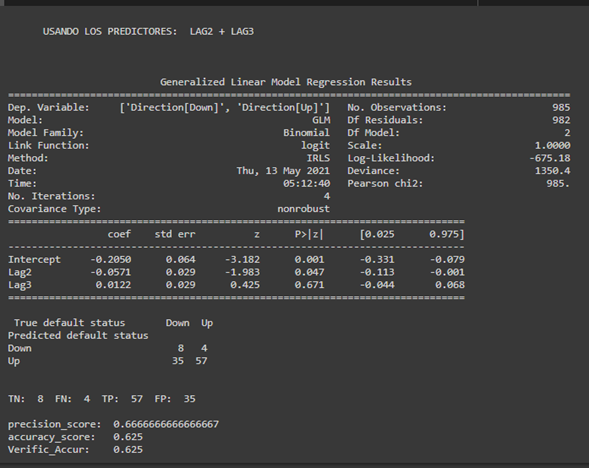

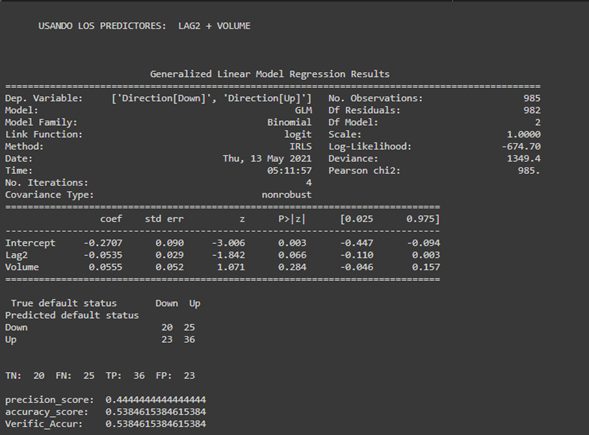

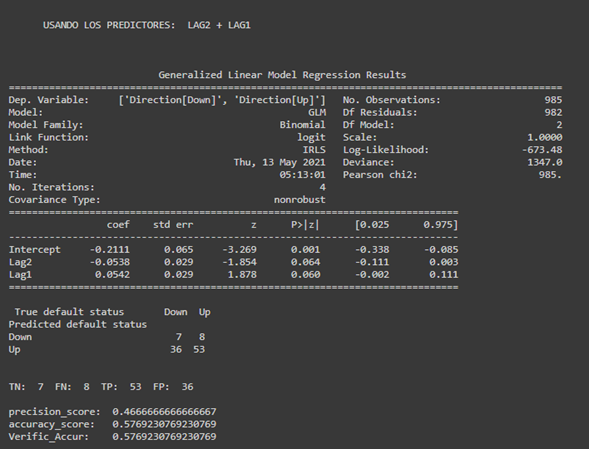

# **LDA Y QDA**

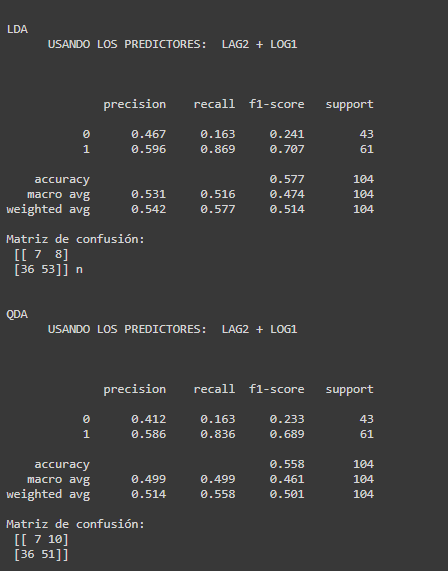

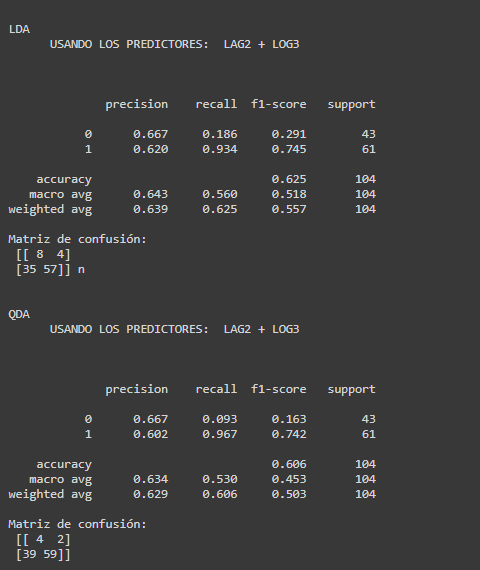

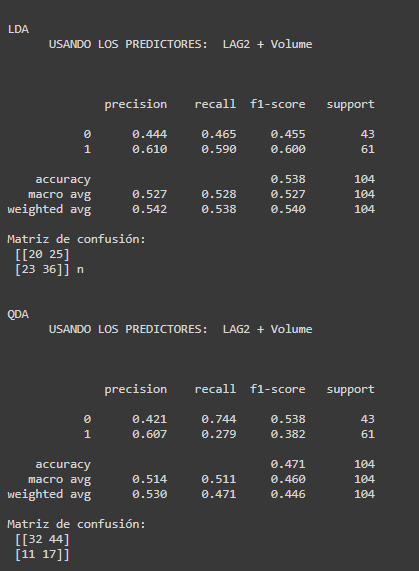

In [156]:
#Entrenamiento
import pandas as pd
print("\n      USANDO LOS PREDICTORES:  LAG2 + Volume\n\n\n")
Path = "/content/drive/MyDrive/PCś/RP/"
dfW = pd.read_csv(Path+'Weekly.csv')
dfW['Direction2'] = dfW['Direction'].factorize()[0]

#Conjunto de entrenamiento
dfW_train = dfW[dfW.Year <= 2008]

#Conjunto de pruebas
dfW_test = dfW[dfW.Year >= 2009]
X_test  = dfW_test[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
y_test  = dfW_test[['Direction']]
y_True = np.asarray(dfW_test['Direction2'])

#Se utiliza el método binomial de statsmodel y se entrena el modelo
import statsmodels.api as sm
import statsmodels.formula.api as smf
mod_bn2 = smf.glm(formula='Direction~Lag2+Volume', data=dfW_train, family=sm.families.Binomial()).fit()
print(mod_bn2.summary())

#Se agregan constantes al conjunto de prueba para usar stastsmodel
X_test = sm.add_constant(X_test)
#Se realizan predicciones con el modelo
y_prob = mod_bn2.predict(X_test)
Tpred = len(y_prob)
# reset indices
y_test = y_test.reset_index()['Direction']
y_prob = y_prob.reset_index()[0]


decision_prob = 0.5 #Frontera de decisión
df_ = pd.DataFrame({'True default status': y_test,
                    'Predicted default status': y_prob > decision_prob})

# matriz de confusión 
import numpy as np

df_.replace(to_replace={True:1, False:0}, inplace=True) #Se remplaza los true por 1 y los false por 0
y_pred = np.asarray(df_['Predicted default status'])
df_.replace(to_replace={0:'Up', 1:'Down'}, inplace=True)
confusion_matrix = df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')
print('\n',confusion_matrix)

FP = np.array(confusion_matrix['Down']['Up'])
FN = np.array(confusion_matrix['Up']['Down'])
TN = np.array(confusion_matrix['Down']['Down'])
TP = np.array(confusion_matrix['Up']['Up'])
VerifAccur =  (TP+TN)/(Tpred)
print('\n')
print('TN: ',TN,' FN: ',FN,' TP: ', TP, ' FP: ', FP)


#Metricas de sklearn
import sklearn.linear_model as lm
import sklearn.discriminant_analysis as da
import sklearn.neighbors as nb
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score

Preci = 1-precision_score(y_True, y_pred)
Acc   = 1-accuracy_score(y_True, y_pred)

#out
print('\nprecision_score: ',Preci)
print('accuracy_score:  ',Acc)
print('Verific_Accur:   ',VerifAccur)


      USANDO LOS PREDICTORES:  LAG2 + Volume



                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                  985
Model:                                              GLM   Df Residuals:                      982
Model Family:                                  Binomial   Df Model:                            2
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -674.70
Date:                                  Thu, 13 May 2021   Deviance:                       1349.4
Time:                                          05:48:37   Pearson chi2:                     985.
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                       

In [157]:
# LDA
print("\nLDA\n      USANDO LOS PREDICTORES:  LAG2 + Volume\n\n\n")

import pandas as pd
import numpy as np
import sklearn.linear_model as lm
import sklearn.discriminant_analysis as da
import sklearn.neighbors as nb
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score

Path = "/content/drive/MyDrive/PCś/RP/"
dfW = pd.read_csv(Path+'Weekly.csv')
dfW['Direction2'] = dfW['Direction'].factorize()[0]

#conjunto de entrenamiento
X_train = dfW[dfW.Year <= 2008][['Lag2','Volume']]
y_train = dfW[dfW.Year <= 2008][['Direction2']]
#conjunto de prueba
X_test  = dfW[dfW.Year >= 2009][['Lag2','Volume']]
y_test  = dfW[dfW.Year >= 2009][['Direction2']]

#Modelo LDA
lda = da.LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
#Parametros LDA
lda.priors_
lda.means_
lda.coef_

y_test = np.array(y_test)
#Matriz de Cofusión
Conf_Matr= confusion_matrix(y_test, y_pred).T
#Out
print(classification_report(y_test, y_pred, digits=3))
print('Matriz de confusión: \n',Conf_Matr,'n\n')


print("\nQDA\n      USANDO LOS PREDICTORES:  LAG2 + Volume\n\n\n")
qda  = da.QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict(X_test)

lda.priors_
lda.means_
lda.coef_

y_test = np.array(y_test)
CM = confusion_matrix(y_test, pred).T
print(classification_report(y_test, pred, digits=3))
print('Matriz de confusión:  \n',CM,'\n\n\n\n\n\n\n\n')




LDA
      USANDO LOS PREDICTORES:  LAG2 + Volume



              precision    recall  f1-score   support

           0      0.444     0.465     0.455        43
           1      0.610     0.590     0.600        61

    accuracy                          0.538       104
   macro avg      0.527     0.528     0.527       104
weighted avg      0.542     0.538     0.540       104

Matriz de confusión: 
 [[20 25]
 [23 36]] n


QDA
      USANDO LOS PREDICTORES:  LAG2 + Volume



              precision    recall  f1-score   support

           0      0.421     0.744     0.538        43
           1      0.607     0.279     0.382        61

    accuracy                          0.471       104
   macro avg      0.514     0.511     0.460       104
weighted avg      0.530     0.471     0.446       104

Matriz de confusión:  
 [[32 44]
 [11 17]] 










/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
